In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

In [5]:
class LinearRegressionAnalysis:
    
    def __init__(self, test_size=0.2, random_state=42):
        """
        Initialize the Linear Regression model
        
        Parameters:
        test_size (float): Proportion of data for testing (default: 0.2)
        random_state (int): Random seed for reproducibility (default: 42)
        """
        self.test_size = test_size
        self.random_state = random_state
        self.model = LinearRegression()
        self.data = None
        self.trained = False
        
    def load_data(self, file_path):
        """
        Load data from CSV file
        
        Parameters:
        file_path (str): Path to the CSV file
        
        Returns:
        DataFrame: Loaded data
        """
        try:
            self.data = pd.read_csv(file_path)
            print("Data loaded successfully")
            print(f"Dataset shape: {self.data.shape}")
            print(f"Columns: {list(self.data.columns)}")
            return self.data
        except Exception as e:
            print(f"Error loading data: {e}")
            return None
    
    def data_summary(self):
        """
        Display comprehensive data summary
        """
        if self.data is None:
            print("Please load data first")
            return
        
        print("DATA SUMMARY")
        print("="*50)
        print(f"Dataset dimensions: {self.data.shape[0]} rows x {self.data.shape[1]} columns")
        
        missing_values = self.data.isnull().sum()
        if missing_values.sum() > 0:
            print("\nMissing values:")
            for col, count in missing_values.items():
                if count > 0:
                    print(f"  {col}: {count}")
        else:
            print("\nNo missing values found")
  
        print(f"\nData types:")
        for col, dtype in self.data.dtypes.items():
            print(f"  {col}: {dtype}")
    
        numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        if len(numeric_columns) > 0:
            print(f"\nStatistical Summary:")
            print(self.data[numeric_columns].describe().round(3))
    
    def display_sample(self, n=5):
        """
        Display first n rows of data
        
        Parameters:
        n (int): Number of rows to display
        """
        if self.data is None:
            print("Please load data first")
            return
        
        print(f"First {n} rows:")
        print(self.data.head(n))
    
    def plot_data_distribution(self, column):
        """
        Plot distribution of a specific column
        
        Parameters:
        column (str): Column name to plot
        """
        if self.data is None:
            print("Please load data first")
            return
        
        if column not in self.data.columns:
            print(f"Column '{column}' not found in data")
            return
        
        plt.figure(figsize=(10, 6))
        plt.hist(self.data[column], bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        plt.show()
    
    def plot_scatter(self, x_column, y_column):
        """
        Create scatter plot between two variables
        
        Parameters:
        x_column (str): Independent variable column name
        y_column (str): Dependent variable column name
        """
        if self.data is None:
            print("Please load data first")
            return
        
        plt.figure(figsize=(10, 6))
        plt.scatter(self.data[x_column], self.data[y_column], alpha=0.6)
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f'{y_column} vs {x_column}')
        plt.grid(True, alpha=0.3)
        
        # Calculate and display correlation
        correlation = self.data[x_column].corr(self.data[y_column])
        plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=plt.gca().transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        plt.show()
    
    def train_model(self, x_column, y_column):
        """
        Train the linear regression model
        
        Parameters:
        x_column (str): Independent variable column name
        y_column (str): Dependent variable column name
        """
        if self.data is None:
            print("Please load data first")
            return
        
        print("TRAINING LINEAR REGRESSION MODEL")
        print("="*40)
        
        X = self.data[[x_column]]
        y = self.data[y_column]
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )
        
        self.model.fit(self.X_train, self.y_train)
        
        self.y_train_pred = self.model.predict(self.X_train)
        self.y_test_pred = self.model.predict(self.X_test)
        
        self.x_column = x_column
        self.y_column = y_column
        self.trained = True
        
        print(f"Training samples: {len(self.X_train)}")
        print(f"Testing samples: {len(self.X_test)}")
        print("Model trained successfully")
    
    def model_summary(self):
        if not self.trained:
            print("Please train the model first")
            return
        
        print("MODEL SUMMARY")
        print("="*30)
        
        intercept = self.model.intercept_
        coefficient = self.model.coef_[0]
        
        print(f"Intercept: {intercept:.4f}")
        print(f"Coefficient: {coefficient:.4f}")
        print(f"\nModel Equation:")
        print(f"{self.y_column} = {intercept:.4f} + {coefficient:.4f} * {self.x_column}")
        
        print(f"\nInterpretation:")
        if coefficient > 0:
            print(f"For every 1 unit increase in {self.x_column}, {self.y_column} increases by {coefficient:.4f}")
        else:
            print(f"For every 1 unit increase in {self.x_column}, {self.y_column} decreases by {abs(coefficient):.4f}")
    
    def evaluate_performance(self):
        """
        Evaluate model performance with various metrics
        """
        if not self.trained:
            print("Please train the model first")
            return
        
        print("MODEL PERFORMANCE EVALUATION")
        print("="*40)
       
        train_r2 = r2_score(self.y_train, self.y_train_pred)
        train_rmse = np.sqrt(mean_squared_error(self.y_train, self.y_train_pred))
        train_mae = mean_absolute_error(self.y_train, self.y_train_pred)
        
        test_r2 = r2_score(self.y_test, self.y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(self.y_test, self.y_test_pred))
        test_mae = mean_absolute_error(self.y_test, self.y_test_pred)
        
        print("Training Set Performance:")
        print(f"  R-squared: {train_r2:.4f}")
        print(f"  RMSE: {train_rmse:.4f}")
        print(f"  MAE: {train_mae:.4f}")
        
        print("\nTesting Set Performance:")
        print(f"  R-squared: {test_r2:.4f}")
        print(f"  RMSE: {test_rmse:.4f}")
        print(f"  MAE: {test_mae:.4f}")
    
        print(f"\nPerformance Interpretation:")
        print(f"  R-squared explains {test_r2*100:.1f}% of variance in {self.y_column}")
        if test_r2 > 0.7:
            print("  This indicates a strong relationship")
        elif test_r2 > 0.5:
            print("  This indicates a moderate relationship")
        else:
            print("  This indicates a weak relationship")
        
        return {
            'train_r2': train_r2, 'test_r2': test_r2,
            'train_rmse': train_rmse, 'test_rmse': test_rmse,
            'train_mae': train_mae, 'test_mae': test_mae
        }
    
    def plot_results(self):
        """
        Visualize model results with multiple plots
        """
        if not self.trained:
            print("Please train the model first")
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Linear Regression Model Results', fontsize=16)
   
        axes[0,0].scatter(self.y_test, self.y_test_pred, alpha=0.6)
        min_val = min(self.y_test.min(), self.y_test_pred.min())
        max_val = max(self.y_test.max(), self.y_test_pred.max())
        axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
        axes[0,0].set_xlabel(f'Actual {self.y_column}')
        axes[0,0].set_ylabel(f'Predicted {self.y_column}')
        axes[0,0].set_title('Actual vs Predicted Values')
        axes[0,0].grid(True, alpha=0.3)
  
        r2 = r2_score(self.y_test, self.y_test_pred)
        axes[0,0].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[0,0].transAxes,
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        residuals = self.y_test - self.y_test_pred
        axes[0,1].scatter(self.y_test_pred, residuals, alpha=0.6)
        axes[0,1].axhline(y=0, color='r', linestyle='--')
        axes[0,1].set_xlabel(f'Predicted {self.y_column}')
        axes[0,1].set_ylabel('Residuals')
        axes[0,1].set_title('Residual Plot')
        axes[0,1].grid(True, alpha=0.3)
        

        axes[1,0].scatter(self.X_test, self.y_test, alpha=0.6, label='Test Data')
        x_line = np.linspace(self.X_test.min(), self.X_test.max(), 100).reshape(-1, 1)
        y_line = self.model.predict(x_line)
        axes[1,0].plot(x_line, y_line, 'r-', linewidth=2, label='Regression Line')
        axes[1,0].set_xlabel(self.x_column)
        axes[1,0].set_ylabel(self.y_column)
        axes[1,0].set_title('Data with Regression Line')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # Plot 4: Residuals Distribution
        axes[1,1].hist(residuals, bins=15, alpha=0.7, edgecolor='black')
        axes[1,1].axvline(residuals.mean(), color='r', linestyle='--', 
                         label=f'Mean: {residuals.mean():.3f}')
        axes[1,1].set_xlabel('Residuals')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].set_title('Distribution of Residuals')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def make_predictions(self, new_values):
        """
        Make predictions for new input values
        
        Parameters:
        new_values (list or float): New values to predict
        
        Returns:
        list: Predicted values
        """
        if not self.trained:
            print("Please train the model first")
            return None
        
        if not isinstance(new_values, list):
            new_values = [new_values]
        
        predictions = self.model.predict(np.array(new_values).reshape(-1, 1))
        
        print("PREDICTIONS")
        print("="*20)
        for value, prediction in zip(new_values, predictions):
            print(f"{self.x_column} = {value} -> Predicted {self.y_column} = {prediction:.2f}")
        
        return predictions.tolist()
    
    def save_results(self, filename='regression_results.csv'):
        """
        Save predictions and results to CSV file
        
        Parameters:
        filename (str): Output filename
        """
        if not self.trained:
            print("Please train the model first")
            return
        
        results_df = pd.DataFrame({
            f'{self.x_column}': self.X_test.values.flatten(),
            f'Actual_{self.y_column}': self.y_test.values,
            f'Predicted_{self.y_column}': self.y_test_pred,
            'Residuals': self.y_test.values - self.y_test_pred,
            'Absolute_Error': np.abs(self.y_test.values - self.y_test_pred)
        })
        
        results_df.to_csv(filename, index=False)
        print(f"Results saved to {filename}")
        print(f"Total predictions saved: {len(results_df)}")
        
        return results_df

In [6]:
def create_sample_data():
    """
    Create sample dataset for demonstration
    """
    np.random.seed(42)
    
    n_samples = 200
    x = np.random.uniform(10, 100, n_samples)
    noise = np.random.normal(0, 10, n_samples)
    y = 2.5 * x + 30 + noise
    
    data = pd.DataFrame({
        'Hours_Studied': x,
        'Test_Score': y
    })
    
    data.to_csv('sample_data.csv', index=False)
    print("Sample data created and saved as 'sample_data.csv'")
    return data

In [7]:
sample_data = create_sample_data()

lr_model = LinearRegressionAnalysis()
data = lr_model.load_data('sample_data.csv')

Sample data created and saved as 'sample_data.csv'
Data loaded successfully
Dataset shape: (200, 2)
Columns: ['Hours_Studied', 'Test_Score']


In [8]:
lr_model.data_summary()

DATA SUMMARY
Dataset dimensions: 200 rows x 2 columns

No missing values found

Data types:
  Hours_Studied: float64
  Test_Score: float64

Statistical Summary:
       Hours_Studied  Test_Score
count        200.000     200.000
mean          53.561     164.576
std           26.540      66.826
min           10.497      48.110
25%           30.572     104.636
50%           54.504     161.289
75%           78.117     223.823
max           98.820     289.548


In [9]:
lr_model.display_sample(10)

First 10 rows:
   Hours_Studied  Test_Score
0      43.708611  132.471280
1      95.564288  271.233256
2      75.879455  222.629362
3      63.879264  182.554645
4      24.041678  108.761939
5      24.039507   94.837096
6      15.227525   56.155778
7      87.955853  256.455169
8      64.100351  180.504061
9      73.726532  222.187176


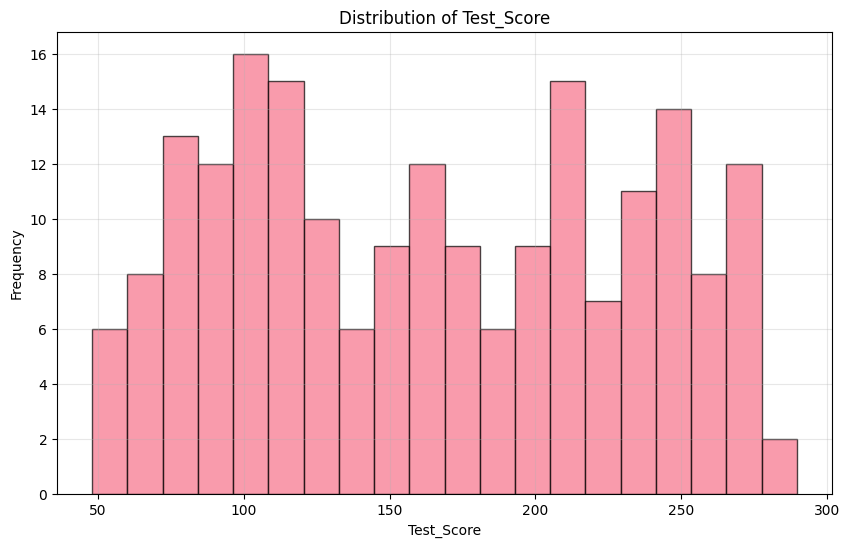

In [10]:
lr_model.plot_data_distribution('Test_Score')

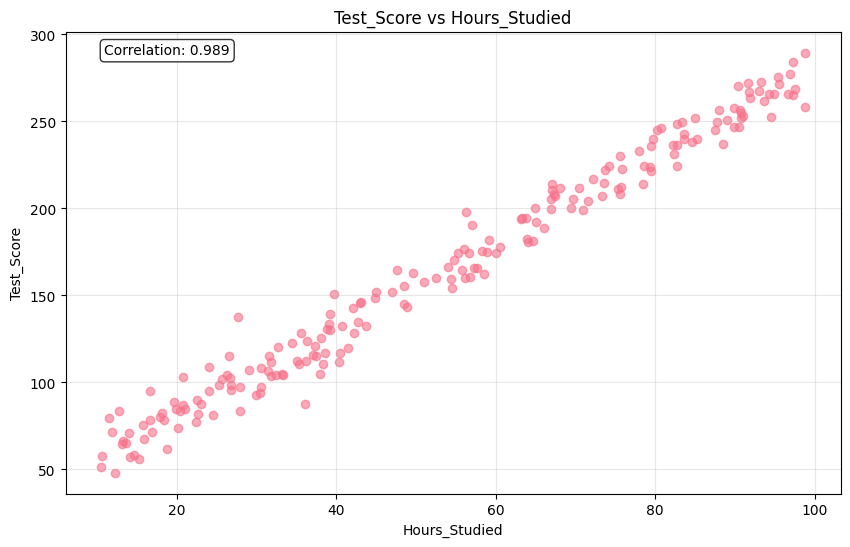

In [11]:
lr_model.plot_scatter('Hours_Studied', 'Test_Score')

In [12]:
lr_model.train_model('Hours_Studied', 'Test_Score')

TRAINING LINEAR REGRESSION MODEL
Training samples: 160
Testing samples: 40
Model trained successfully


In [13]:
lr_model.model_summary()

MODEL SUMMARY
Intercept: 30.0290
Coefficient: 2.5116

Model Equation:
Test_Score = 30.0290 + 2.5116 * Hours_Studied

Interpretation:
For every 1 unit increase in Hours_Studied, Test_Score increases by 2.5116


In [14]:
performance_metrics = lr_model.evaluate_performance()

MODEL PERFORMANCE EVALUATION
Training Set Performance:
  R-squared: 0.9800
  RMSE: 9.4855
  MAE: 7.5000

Testing Set Performance:
  R-squared: 0.9741
  RMSE: 10.4145
  MAE: 8.3874

Performance Interpretation:
  R-squared explains 97.4% of variance in Test_Score
  This indicates a strong relationship


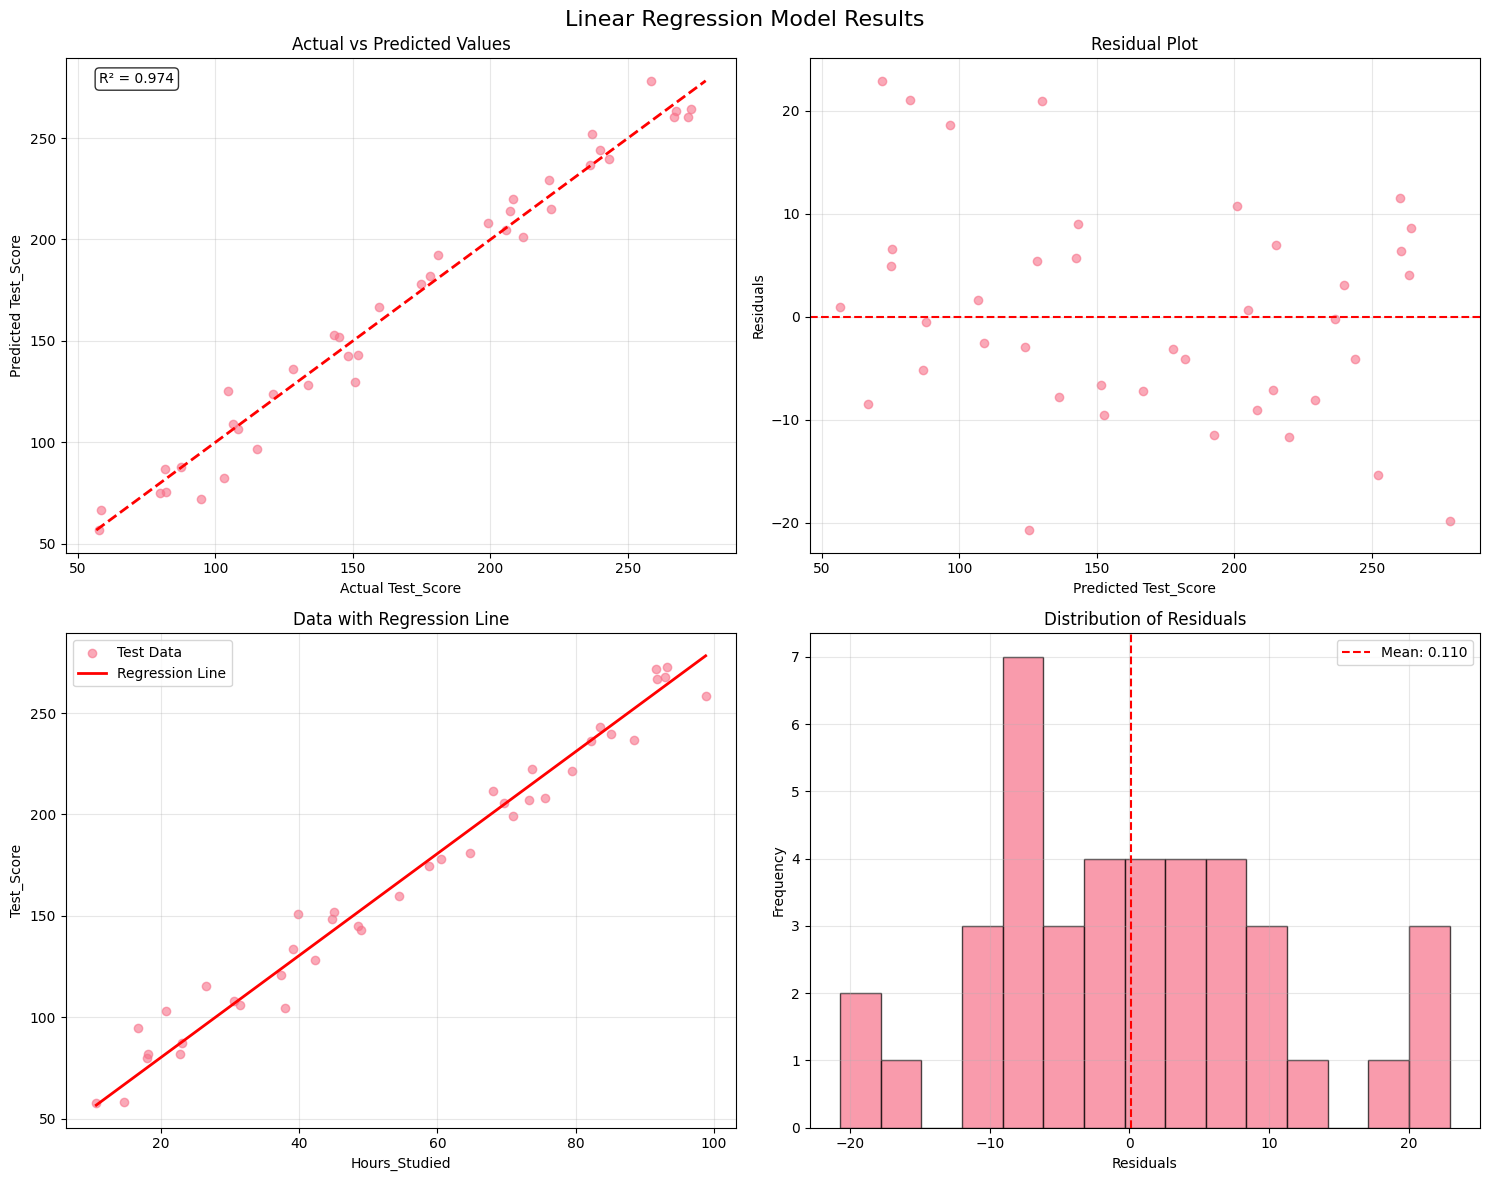

In [15]:
lr_model.plot_results()

In [16]:
new_values = [25, 50, 75, 90]
predictions = lr_model.make_predictions(new_values)

PREDICTIONS
Hours_Studied = 25 -> Predicted Test_Score = 92.82
Hours_Studied = 50 -> Predicted Test_Score = 155.61
Hours_Studied = 75 -> Predicted Test_Score = 218.40
Hours_Studied = 90 -> Predicted Test_Score = 256.08


In [17]:
results_df = lr_model.save_results('my_regression_results.csv')
print("\nSaved Results Preview:")
print(results_df.head())

Results saved to my_regression_results.csv
Total predictions saved: 40

Saved Results Preview:
   Hours_Studied  Actual_Test_Score  Predicted_Test_Score  Residuals  \
0      54.441604         159.570717            166.766403  -7.195687   
1      26.506406         115.233945             96.603418  18.630526   
2      64.679037         180.988667            192.479085 -11.490419   
3      31.387379         106.291635            108.862635  -2.571000   
4      10.625692          57.699403             56.716881   0.982522   

   Absolute_Error  
0        7.195687  
1       18.630526  
2       11.490419  
3        2.571000  
4        0.982522  


In [18]:
def model_insights():
    
    print("MODEL INSIGHTS AND RECOMMENDATIONS")
    print("="*50)
    
    performance = lr_model.evaluate_performance()
    test_r2 = performance['test_r2']
    
    print("Model Quality Assessment:")
    if test_r2 > 0.8:
        print("- Excellent model performance")
        print("- High predictive accuracy")
        print("- Strong linear relationship")
    elif test_r2 > 0.6:
        print("- Good model performance")
        print("- Moderate predictive accuracy")
        print("- Reasonable linear relationship")
    elif test_r2 > 0.4:
        print("- Fair model performance")
        print("- Limited predictive accuracy")
        print("- Weak linear relationship")
    else:
        print("- Poor model performance")
        print("- Low predictive accuracy")
        print("- Very weak or no linear relationship")
    
    print(f"\nRecommendations:")
    print("- Use this model for predictions within the data range")
    print("- Be cautious about extrapolation beyond observed values")
    if test_r2 < 0.7:
        print("- Consider adding more features to improve accuracy")
        print("- Check for non-linear relationships")

model_insights()

MODEL INSIGHTS AND RECOMMENDATIONS
MODEL PERFORMANCE EVALUATION
Training Set Performance:
  R-squared: 0.9800
  RMSE: 9.4855
  MAE: 7.5000

Testing Set Performance:
  R-squared: 0.9741
  RMSE: 10.4145
  MAE: 8.3874

Performance Interpretation:
  R-squared explains 97.4% of variance in Test_Score
  This indicates a strong relationship
Model Quality Assessment:
- Excellent model performance
- High predictive accuracy
- Strong linear relationship

Recommendations:
- Use this model for predictions within the data range
- Be cautious about extrapolation beyond observed values
